<a href="https://colab.research.google.com/github/INIKA-N/Neural-Network/blob/main/Tensorflow_code_for_email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
train_data=pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")

In [32]:
train_data.Message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [33]:
import numpy as np

vocab = list(set([word for text in train_data["Message"] for word in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found' % vocab_size)
print(vocab)

train_data.Message=train_data.Message.str.lower()  #make lower
import string
def remove_punctuation(test_str):                  # remove punctuation
    return test_str.translate(str.maketrans('','',string.punctuation))
train_data.Message=train_data.Message.map(remove_punctuation)
import numpy as np

vocab = list(set([word for text in train_data["Message"] for word in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found' % vocab_size)
print(vocab)

from gensim.parsing.preprocessing import remove_stopwords
train_data.Message=train_data.Message.map(remove_stopwords)

15688 unique words found
['', '09065171142-stopsms-08', '12:30', '@kiosk.', '(Txt', 'minor', 'HUN!', 'announcement', 'doing?how', '%', 'Welcome', 'hurt..', 'announcement.', 'anti', 'MIN', 'Them', 'Anything!', 'thanx.', 'again?', 'CAMERA', 'Cali', 'Argument', 'ironing', '150p/meg.', 'holiday.', 'J', 'Orh', 'liver.', 'SAID', 'RED', 'iam', 'TOMORROW', 'job', 'bold.', 'wtc', 'brownies', 'COME', 'mu', 'laden.', 'Brilliant.', 'voice...', 'tolerance', 'restocked', 'TRUE', 'Princess!', 'thou', '1Tulsi', 'WITHOUT', 'god..taken', '8.30.', 'mtnl', "couldn't", 'cnl', 'HATES', 'feeling.', 'ice.', 'nte.:-', 'arent', 'office.thenampet', 'India', 'darkness,', 'diapers', 'filling', 'formal...', 'olave', 'Other..', 'BEST', 'Msg', 'considering', 'availa', '09058094583', 'exhaust', 'college?', 'aka', 'dificult', 'na', '7.30ish?', 'call09050000327', '10p/min.', 'gone.', 'tm.', 'Terms', 'Arcade.', 'closeby', 'card!', "mum's", 'EXPLAIN', '~', 'thuglyfe', 'sink', 'MESSAGE', 'fine:)', 'chasing', 'SW73SS', 'sho

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Assuming your DataFrame has a 'Message' column for input and a 'Category' column for output
X = train_data['Message']
y = train_data['Category']

# Convert 'Category' to numeric format (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

1978    reply win £100 weekly 2006 fifa world cup held...
3989    hello sort town dont rush home eating nachos l...
3935                           come guoyang n tell u told
4078    hey sathya till dint meet single time saw situ...
4086    orange brings ringtones time chart heroes free...
                              ...                        
3772                      hi wlcome wonder got eaten lion
5191                                      sorry ill later
5226                prabhaim sorydarealyfrm heart im sory
5390                             nt joking seriously told
860                                  somebody named tampa
Name: Message, Length: 4457, dtype: object

In [36]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

## 3. Building the Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

### 3.1 Text Vectorization

In [38]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 20
max_len = 5
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [39]:
# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
vectorize_layer.adapt(X_train)

In [40]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'u',
 '2',
 'im',
 'ur',
 '4',
 'ok',
 'free',
 'dont',
 'ltgt',
 'know',
 'ill',
 'got',
 'like',
 'good',
 'come',
 'time',
 'love',
 'send']

In [41]:
vectorize_layer.get_weights()

[array([b'u', b'2', b'im', b'ur', b'4', b'ok', b'free', b'dont', b'ltgt',
        b'know', b'ill', b'got', b'like', b'good', b'come', b'time',
        b'love', b'send'], dtype=object)]

In [42]:
model.add(vectorize_layer)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 5)                 0         
 Vectorization)                                                  
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.2 Embedding

In [44]:
from tensorflow.keras.layers import Embedding

# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
model.add(Embedding(max_tokens + 1, 8))

## 3.3 The Recurrent Layer

In [45]:
from tensorflow.keras.layers import LSTM, SimpleRNN

# 64 is the "units" parameter, which is the
# dimensionality of the output space.
model.add(LSTM(16))
# model.add(SimpleRNN(16))

In [46]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 5)                 0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 5, 8)              168       
                                                                 
 lstm_1 (LSTM)               (None, 16)                1600      
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2057 (8.04 KB)
Trainable params: 2057 (8.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

## 4. Compiling the Model


In [48]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

## 4. Compiling the Model


In [49]:
history = model.fit(X_train, y_train, epochs=50)


Epoch 1/50
140/140 [==============================] - 4s 6ms/step - loss: 0.4583 - accuracy: 0.8658
Epoch 2/50
140/140 [==============================] - 1s 6ms/step - loss: 0.3382 - accuracy: 0.8658
Epoch 3/50
140/140 [==============================] - 1s 6ms/step - loss: 0.3093 - accuracy: 0.8696
Epoch 4/50
140/140 [==============================] - 1s 5ms/step - loss: 0.3049 - accuracy: 0.8755
Epoch 5/50
140/140 [==============================] - 1s 5ms/step - loss: 0.3031 - accuracy: 0.8779
Epoch 6/50
140/140 [==============================] - 1s 5ms/step - loss: 0.3030 - accuracy: 0.8770
Epoch 7/50
140/140 [==============================] - 1s 5ms/step - loss: 0.3017 - accuracy: 0.8764
Epoch 8/50
140/140 [==============================] - 1s 6ms/step - loss: 0.3014 - accuracy: 0.8777
Epoch 9/50
140/140 [==============================] - 1s 5ms/step - loss: 0.2997 - accuracy: 0.8770
Epoch 10/50
140/140 [==============================] - 1s 7ms/step - loss: 0.2999 - accuracy: 0.8779

In [50]:
import matplotlib.pylab as plt


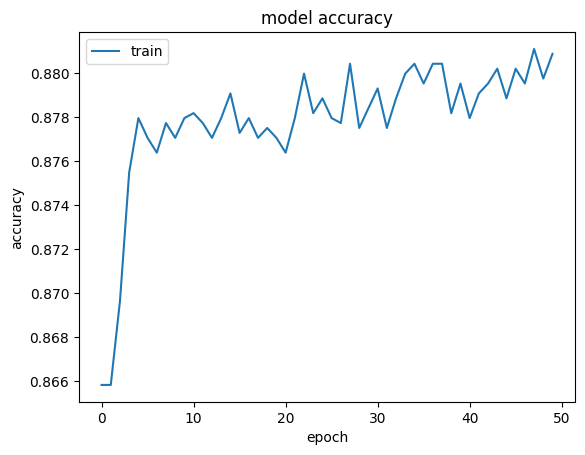

In [51]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


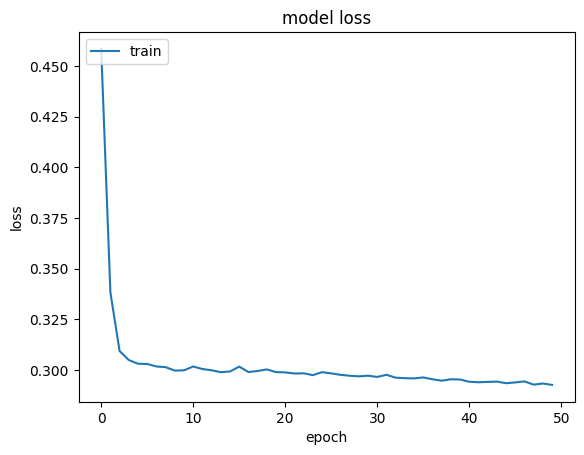

In [52]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
print(model.predict([
  "very good",
]))

1/1 [==============================] - 1s 615ms/step
[[0.00177497]]


In [54]:
print(model.predict([
  "very bad",
]))

1/1 [==============================] - 0s 45ms/step
[[0.00238592]]


In [55]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(21, 8)


# Embedding Layer Projector
http://projector.tensorflow.org/

In [57]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(21, 8)


In [58]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [59]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
import numpy as np

In [61]:
# read from file in tsv format
words = np.loadtxt('meta.tsv', skiprows=1, dtype=str)
words

array(['u', '2', 'im', 'ur', '4', 'ok', 'free', 'dont', 'ltgt', 'know',
       'ill', 'got', 'like', 'good', 'come', 'time', 'love', 'send'],
      dtype='<U4')

In [62]:
# read vectors in tsv format
vectors = np.loadtxt('vecs.tsv', skiprows=1)
vectors

array([[ 0.10765757, -0.13795486,  0.02341936, -0.0336943 , -0.12287077,
        -0.10555914,  0.05636856,  0.02204059],
       [-0.01129885, -0.01867329,  0.00281341,  0.13228816,  0.0369913 ,
         0.02907394,  0.00934831,  0.2972642 ],
       [ 0.4286896 , -0.31428766,  0.6328637 , -0.26153588, -0.32301518,
        -0.42069748, -0.4233665 , -0.03821686],
       [-0.05322204,  0.07983343, -0.1960528 ,  0.05602534,  0.04872446,
         0.08960326,  0.19398351, -0.30360723],
       [-0.0596082 ,  0.15783878, -0.02948034,  0.18506545,  0.123173  ,
         0.05505044, -0.02734882,  0.315117  ],
       [ 0.63385236, -0.45202658,  1.0064013 , -0.4012292 , -0.53247434,
        -0.5400286 , -0.7261846 , -0.25082   ],
       [-0.34719577,  0.49923444, -0.3940227 ,  0.41648173,  0.4618584 ,
         0.32440117,  0.43187287,  0.15388434],
       [ 0.20439231, -0.26909894,  0.09059397, -0.18368432, -0.17257375,
        -0.18176976, -0.05823707, -0.16205266],
       [ 0.70468444, -0.9830535 

In [63]:
# plotly scatter plot with metadata as labels
import plotly.express as px

fig = px.scatter(x=vectors[:,0], y=vectors[:,1], labels={'x':'x', 'y':'y'}, hover_name=words)
fig.show()

In [64]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 2))
model2.add(SimpleRNN(16, return_sequences=True))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 5)                 0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 5, 2)              42        
                                                                 
 simple_rnn (SimpleRNN)      (None, 5, 16)             304       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                      

In [65]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [66]:
history = model2.fit(X_train, y_train, epochs=200)


Epoch 1/200
140/140 [==============================] - 3s 7ms/step - loss: 0.4159 - accuracy: 0.8645
Epoch 2/200
140/140 [==============================] - 1s 6ms/step - loss: 0.3697 - accuracy: 0.8678
Epoch 3/200
140/140 [==============================] - 1s 6ms/step - loss: 0.3181 - accuracy: 0.8750
Epoch 4/200
140/140 [==============================] - 1s 6ms/step - loss: 0.3059 - accuracy: 0.8779
Epoch 5/200
140/140 [==============================] - 1s 10ms/step - loss: 0.3016 - accuracy: 0.8773
Epoch 6/200
140/140 [==============================] - 1s 8ms/step - loss: 0.2997 - accuracy: 0.8788
Epoch 7/200
140/140 [==============================] - 1s 7ms/step - loss: 0.2991 - accuracy: 0.8793
Epoch 8/200
140/140 [==============================] - 1s 5ms/step - loss: 0.2976 - accuracy: 0.8786
Epoch 9/200
140/140 [==============================] - 1s 7ms/step - loss: 0.2972 - accuracy: 0.8791
Epoch 10/200
140/140 [==============================] - 1s 6ms/step - loss: 0.2974 - accur

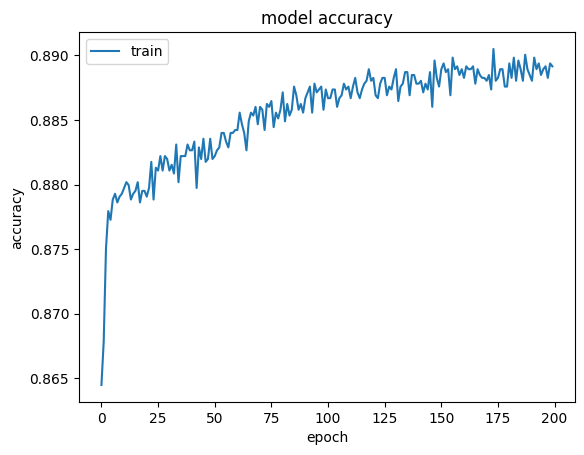

In [67]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
